**Otras formas de analizar el supuesto de la clase pasada (linealidad y cambio estructural)**

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

In [3]:
data=pd.read_csv(r"C:\Users\fcecursos\Downloads\Econometria-en-Python-main (1)\Econometria-en-Python-main\Bases de datos\GujaratiPorter71.txt", delimiter="\t")

In [4]:
data.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


In [5]:
modelo = sm.OLS(data["CM"],sm.add_constant(data[["PGNP","FLR"]]))
resultados = modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           5.12e-17
Time:                        11:29:16   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6416     11.593     22.741      0.0

In [7]:
residuos = resultados.resid
valores_estimados = resultados.predict()

In [9]:
valores_estimados

array([170.51378125, 213.8126422 , 226.18576952, 115.36995402,
        82.46555065, 204.49103764, 159.43700917, 197.23162096,
       238.41655119, 139.26685789,  62.83064509, 135.82243505,
        46.33550355, 187.9688439 ,  85.2594343 ,  77.94355168,
       193.41898868, 105.93541756, 165.31182934, 152.65873384,
       224.06711569, 184.01150442, 131.04752009,  58.94157934,
       197.57041665, 116.1604773 ,  52.44091063, 115.03351989,
       151.92231495,  11.07970932,  73.81681435, 209.32241854,
       103.27571983, 123.30696208, 193.16371113, 107.20944374,
       238.02128956,  55.46065808, 209.46476419, 213.24798272,
       236.07203357, 241.69393775, 188.75936718, 219.54747828,
        57.49343221, 181.13174106,  66.61622518,  84.32656538,
        70.06064802, 188.86993752, 218.70048905, 215.19723871,
        62.33189779,  76.8953893 , 160.11696211,  63.47882272,
       198.84208126,  26.96532178, 164.74953142, 116.98277588,
       161.52624926,  53.45965925, 161.97797684, 110.96

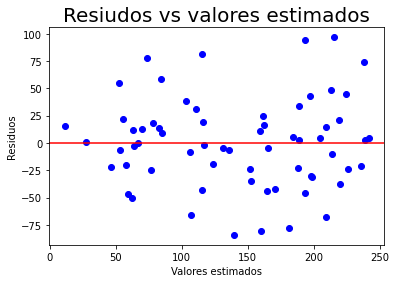

In [12]:
fig,ax=plt.subplots()
ax.scatter(valores_estimados,residuos,color = "blue")
ax.set_xlabel("Valores estimados")
ax.set_ylabel("Residuos")
ax.set_title("Resiudos vs valores estimados",fontsize=20)
ax.axhline(color="red")
plt.show()

**Supuesto de Linealidad**

In [16]:
resultados_linealidad = sms.linear_harvey_collier(resultados)
nombres = ["Estadistico","p-valor"]
pd.DataFrame(resultados_linealidad, index=nombres, columns=["HC"])

,HC
Estadistico,-0.075064
p-valor,0.940414


In [17]:
np.mean(residuos)

1.254552017826427e-13

In [19]:
resultados_rainbow= sms.linear_rainbow(resultados) 

In [20]:
nombres = ["Estadístico","p-valor"]

In [21]:
pd.DataFrame({"Rainbow":resultados_rainbow}, index=nombres)

,Rainbow
Estadístico,0.692622
p-valor,0.843955


**Supuesto 4: Homoscedasticidad**

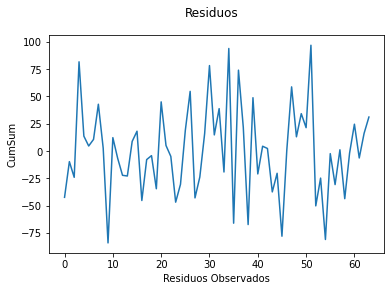

In [23]:
fig, ax = plt.subplots()
fig.suptitle("Residuos")
ax.plot(residuos) 
ax.set_xlabel("Residuos Observados")
ax.set_ylabel("CumSum")
plt.show()

In [25]:
explicativas = resultados.model.exog
resultados_test = sms.het_breuschpagan(residuos, explicativas)
nombres_test = ["Estadístico LM", "P-value LM", "Estadístico F", "P-value F"]
pd.Series(resultados_test, index = nombres_test)

Estadístico LM    1.591582
P-value LM        0.451224
Estadístico F     0.777832
P-value F         0.463904
dtype: float64

In [26]:
pd.DataFrame({"BP":resultados_test}, index = nombres_test)

,BP
Estadístico LM,1.591582
P-value LM,0.451224
Estadístico F,0.777832
P-value F,0.463904


In [27]:
pd.DataFrame(pd.Series(resultados_test, index = nombres_test), columns = ["BreushPagan"])

,BreushPagan
Estadístico LM,1.591582
P-value LM,0.451224
Estadístico F,0.777832
P-value F,0.463904


In [28]:
test_white = sms.het_white(residuos,explicativas)
nombres_test = ["Estadístico LM", "P-value LM", "Estadístico F", "P-value F"]
pd.Series(test_white, index = nombres_test)

Estadístico LM    2.356718
P-value LM        0.797902
Estadístico F     0.443486
P-value F         0.816252
dtype: float64

**Supuesto de No Autocorrelación**

In [29]:
test_dw = sms.durbin_watson(residuos)
nombres_dw = ["Estadístico DW"]
pd.Series(test_dw,nombres_dw)

Estadístico DW    2.186159
dtype: float64

In [33]:
test_breush = sms.acorr_breusch_godfrey(resultados,nlags=1)
pd.Series(test_breush, index = nombres_test)

Estadístico LM    0.728605
P-value LM        0.393336
Estadístico F     0.690933
P-value F         0.409143
dtype: float64

In [50]:
test_jungbox= sms.acorr_ljungbox(residuos, lags=1, boxpierce=True)
test_jungbox

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.754915,0.384924,0.720601,0.395947


**Supuesto de normalidad**

In [51]:
test_jb= sms.jarque_bera(residuos)
nombres_jb = ["JB", "p-value","Asimetría","Curtosis"]
pd.Series(test_jb, index =nombres_jb)

JB           0.559405
p-value      0.756009
Asimetría    0.227575
Curtosis     2.948855
dtype: float64

In [53]:
test_ad = sms.normal_ad(residuos)
nombres_ad=["AD","p-valor AD"]
pd.Series(test_ad, index = nombres_ad)

AD            0.329856
p-valor AD    0.508773
dtype: float64

In [54]:
test_ks= sms.diagnostic.kstest_normal(residuos)
nombres_ks = ["KS", "p-valor KS"]
pd.Series(test_ks, index = nombres_ks)

KS            0.081275
p-valor KS    0.426935
dtype: float64

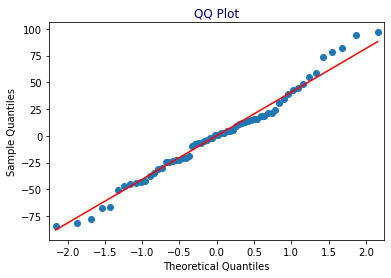

In [60]:
fig, ax = plt.subplots()
probplot = sm.ProbPlot(residuos)
probplot.qqplot(line = "s", ax = ax)
ax.set_title("QQ Plot", color = "darkblue");

**Funciones de Probabilidad (Acumulada)**

In [61]:
x = np.sort(residuos)
n = x.size
y = np.arange(1, n+1) / n 

In [65]:
residuos_teoricos = np.random.normal(loc = np.mean(residuos),
scale = np.std(residuos),
size = 10000)

residuos_teoricos

array([ 17.76373089,  17.14040151, -28.07754662, ...,  42.5950846 ,
        -9.02010049,  11.4027263 ])

In [66]:
x_teor = np.sort(residuos_teoricos)
n_teor = x_teor.size
y_teor = np.arange(1, n_teor+1) / n_teor

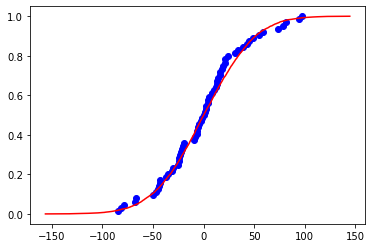

In [68]:
fig, ax = plt.subplots()
ax.plot(x_teor, y_teor, color = "red")
ax.scatter(x,y, color = "blue")
plt.show()